In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, UpSampling2D, LeakyReLU, BatchNormalization, Dense, Flatten, Reshape, Input, Concatenate
from tensorflow.keras.models import Model
import numpy as np
import cv2
import os
import glob
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2DTranspose, LeakyReLU, BatchNormalization
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten
from tensorflow.keras.models import Model

In [ ]:
!gdown --folder https://drive.google.com/drive/folders/1R0iAMQ-sqZXHjPgnlNc99H_X7S4P0524?usp=sharing
!unzip /content/Dataset/Copy of images.zip

Retrieving folder contents
Processing file 1aw5vVI3Mx6mXQq9xBfS8Re9_CkaxaKVR Copy of images.zip
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1aw5vVI3Mx6mXQq9xBfS8Re9_CkaxaKVR
From (redirected): https://drive.google.com/uc?id=1aw5vVI3Mx6mXQq9xBfS8Re9_CkaxaKVR&confirm=t&uuid=09e5b56d-f486-4af8-9a2f-42cf88531961
To: /content/Dataset/Copy of images.zip
100% 41.2M/41.2M [00:00<00:00, 91.9MB/s]
Download completed
unzip:  cannot find or open /content/Dataset/Copy, /content/Dataset/Copy.zip or /content/Dataset/Copy.ZIP.


In [ ]:
!unzip "/content/Dataset/Copy of images.zip" -d "/content/Dataset/"

Archive:  /content/Dataset/Copy of images.zip
replace /content/Dataset/data/24301.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/Dataset/data/24301.jpg  
  inflating: /content/Dataset/data/24309.jpg  
  inflating: /content/Dataset/data/24314.jpg  
  inflating: /content/Dataset/data/24287.jpg  
  inflating: /content/Dataset/data/24269.jpg  
  inflating: /content/Dataset/data/24300.jpg  
  inflating: /content/Dataset/data/24266.jpg  
  inflating: /content/Dataset/data/24325.jpg  
  inflating: /content/Dataset/data/24328.jpg  
  inflating: /content/Dataset/data/24304.jpg  
  inflating: /content/Dataset/data/24295.jpg  
  inflating: /content/Dataset/data/24334.jpg  
  inflating: /content/Dataset/data/24322.jpg  
  inflating: /content/Dataset/data/24329.jpg  
  inflating: /content/Dataset/data/24320.jpg  
  inflating: /content/Dataset/data/24279.jpg  
  inflating: /content/Dataset/data/24315.jpg  
  inflating: /content/Dataset/data/24321.jpg  
  inflating: /content/Datas

In [ ]:
print(os.listdir("/content/Dataset/"))

['Copy of images.zip', 'data']


In [ ]:
IMG_SIZE = 120
DATASET_PATH = "/content/Dataset/data"

def load_images(path, limit=500):
    images = []
    for file in glob.glob(os.path.join(path, "*.jpg"))[:limit]:
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 127.5 - 1
        images.append(img)
    return np.array(images)

rgb_images = load_images(DATASET_PATH)
print(f"Number of RGB images loaded: {len(rgb_images)}")

gray_images = np.array([cv2.cvtColor(((img + 1) * 127.5).astype(np.uint8), cv2.COLOR_RGB2GRAY) for img in rgb_images])
gray_images = gray_images.reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 127.5 - 1

Number of RGB images loaded: 500


In [ ]:
def build_generator():
    input_layer = Input(shape=(IMG_SIZE, IMG_SIZE, 1))

    x = Conv2D(64, (3,3), padding="same", activation=LeakyReLU(0.2))(input_layer)
    x = Conv2D(128, (3,3), padding="same", activation=LeakyReLU(0.2))(x)
    x = BatchNormalization()(x)

    x = Conv2DTranspose(64, (3,3), strides=1, padding="same", activation=LeakyReLU(0.2))(x)
    x = Conv2DTranspose(3, (3,3), padding="same", activation="tanh")(x)

    return Model(input_layer, x, name="Generator")

generator = build_generator()
generator.summary()

Model: "Generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 120, 120, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 120, 120, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 120, 120, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 120, 120, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 120, 120, 3)         │           1,731 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 150,531 (588.01 KB)

 Trainable params: 150,275 (587.01 KB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
from tensorflow.keras.layers import Concatenate

def build_discriminator():
    input_real = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    input_fake = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    combined = Concatenate(axis=-1)([input_real, input_fake])

    x = Conv2D(64, (3,3), strides=2, padding="same", activation=LeakyReLU(0.2))(combined)
    x = Conv2D(128, (3,3), strides=2, padding="same", activation=LeakyReLU(0.2))(x)
    x = Flatten()(x)
    x = Dense(1, activation="sigmoid")(x)

    return Model([input_real, input_fake], x, name="Discriminator")

discriminator = build_discriminator()
discriminator.summary()

Model: "Discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 120, 120, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 120, 120, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 120, 120, 6)    │              0 │ input_layer_2[0][0],   │
│                           │                        │                │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 60, 60, 64)     │          3,520 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 30, 30, 128)    │         73,856 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 115200)         │              0 │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 1)              │        115,201 │ flatten[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 192,577 (752.25 KB)

 Trainable params: 192,577 (752.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def build_gan(generator, discriminator):
    discriminator.trainable = False

    gray_input = Input(shape=(IMG_SIZE, IMG_SIZE, 1))
    generated_img = generator(gray_input)
    validity = discriminator([generated_img, generated_img])

    return Model(gray_input, validity)

discriminator.trainable = True
discriminator.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5), metrics=["accuracy"])

gan = build_gan(generator, discriminator)
gan.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))

In [ ]:
BATCH_SIZE = 32
EPOCHS = 500

real_labels = np.ones((BATCH_SIZE, 1))
fake_labels = np.zeros((BATCH_SIZE, 1))
for epoch in range(EPOCHS):

    idx = np.random.randint(0, gray_images.shape[0], BATCH_SIZE)
    gray_batch, real_batch = gray_images[idx], rgb_images[idx]

    fake_batch = generator.predict(gray_batch)

    d_real_loss, _ = discriminator.train_on_batch([real_batch, real_batch], real_labels)
    d_fake_loss, _ = discriminator.train_on_batch([fake_batch, real_batch], fake_labels)
    d_loss = 0.5 * (d_real_loss + d_fake_loss)

    g_loss = gan.train_on_batch(gray_batch, real_labels)

    if epoch % 1000 == 0:
        print(f"Epoch {epoch} | D Loss: {d_loss:.4f} | G Loss: {g_loss:.4f}")

print("Training Completed!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0 | D Loss: 0.6976 | G Loss: 0.6792
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


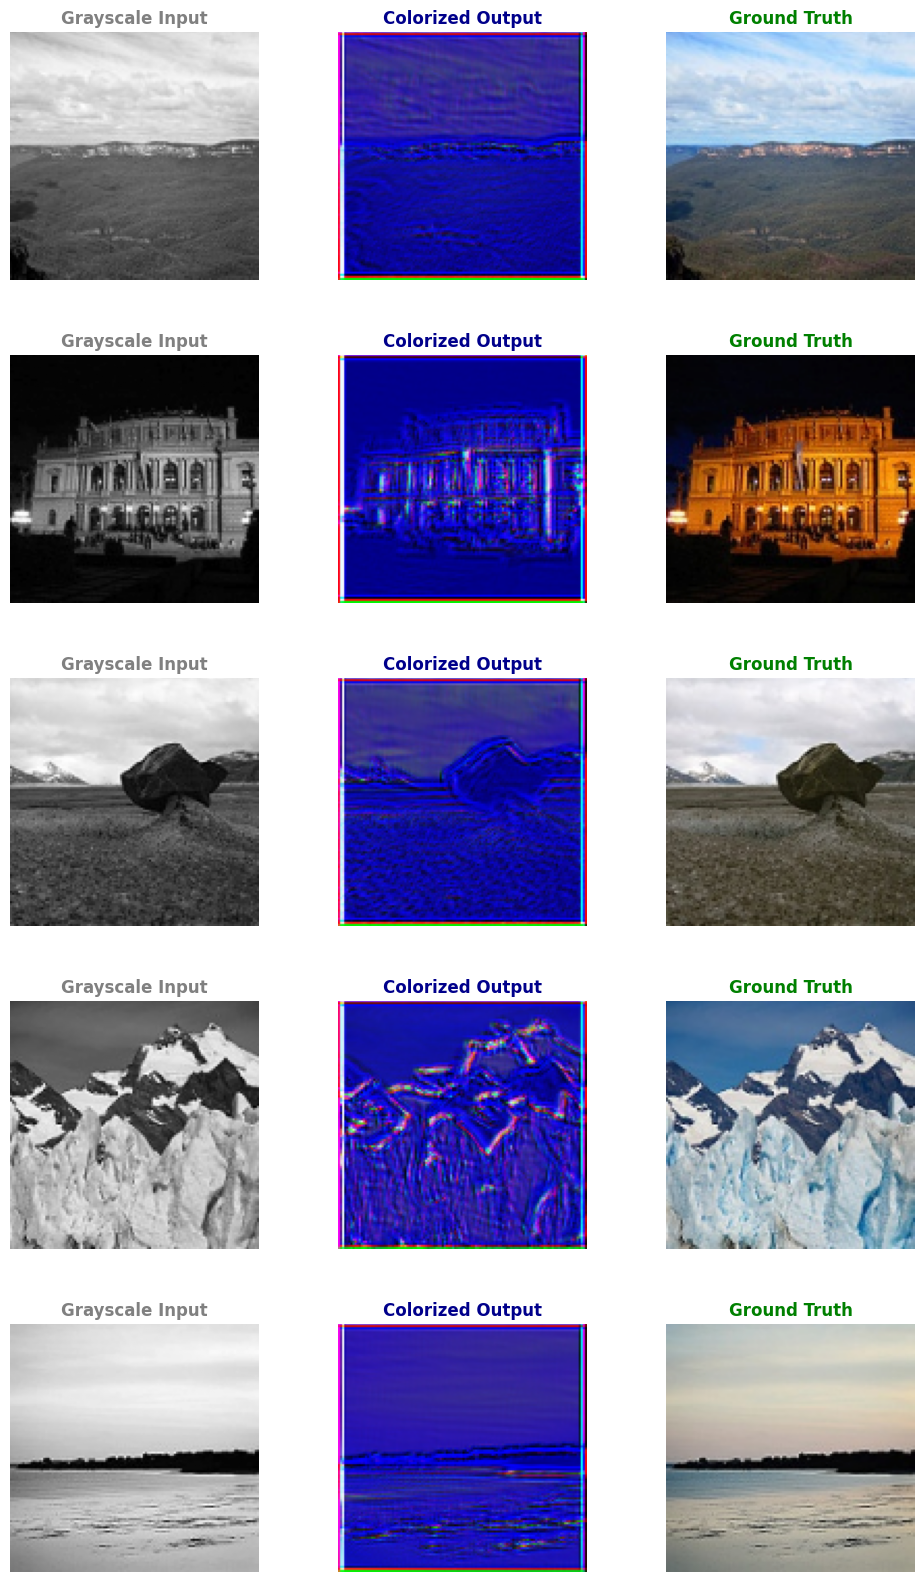

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def display_results(generator, gray_images, rgb_images, n_samples=5):
    indices = np.random.randint(0, gray_images.shape[0], n_samples)
    gray_sample = gray_images[indices]
    real_sample = rgb_images[indices]
    fake_sample = generator.predict(gray_sample)

    gray_sample = ((gray_sample + 1) * 127.5).astype(np.uint8)
    fake_sample = ((fake_sample + 1) * 127.5).astype(np.uint8)
    real_sample = ((real_sample + 1) * 127.5).astype(np.uint8)

    fig, axes = plt.subplots(n_samples, 3, figsize=(12, 4 * n_samples))
    plt.subplots_adjust(hspace=0.3, wspace=0.2)

    for i in range(n_samples):
        axes[i, 0].imshow(gray_sample[i].squeeze(), cmap="gray")
        axes[i, 0].set_title("Grayscale Input", fontsize=12, fontweight='bold', color='gray')
        axes[i, 0].axis("off")

        axes[i, 1].imshow(fake_sample[i])
        axes[i, 1].set_title("Colorized Output", fontsize=12, fontweight='bold', color='darkblue')
        axes[i, 1].axis("off")

        axes[i, 2].imshow(real_sample[i])
        axes[i, 2].set_title("Ground Truth", fontsize=12, fontweight='bold', color='green')
        axes[i, 2].axis("off")

    plt.show()

display_results(generator, gray_images, rgb_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


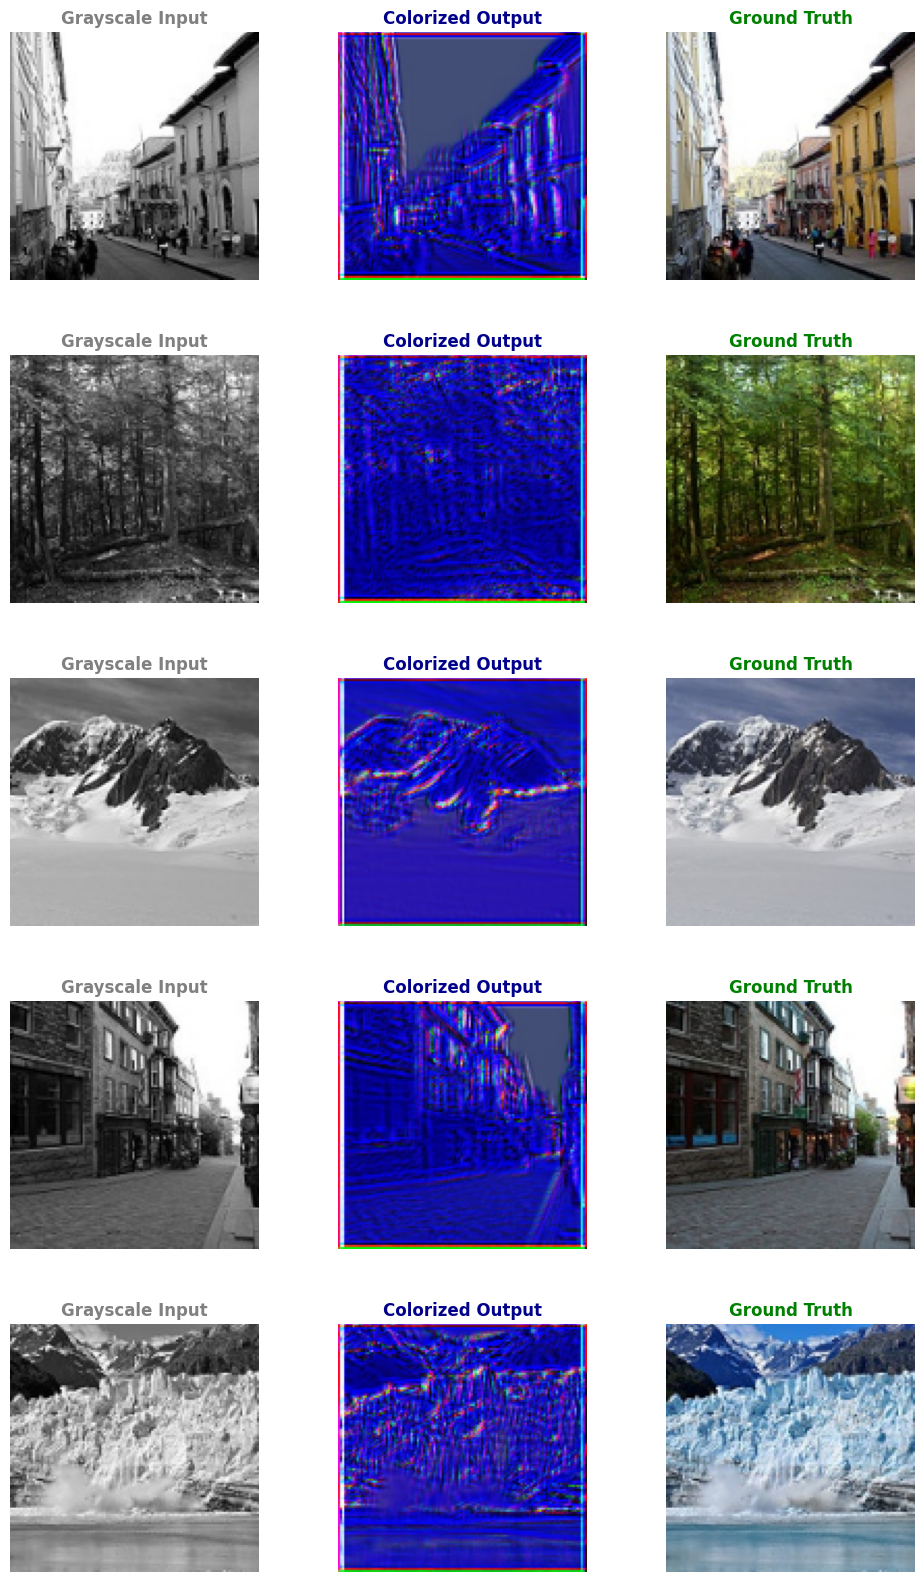

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def display_results(generator, gray_images, rgb_images, n_samples=5):
    indices = np.random.randint(0, gray_images.shape[0], n_samples)
    gray_sample = gray_images[indices]
    real_sample = rgb_images[indices]
    fake_sample = generator.predict(gray_sample)

    gray_sample = ((gray_sample + 1) * 127.5).astype(np.uint8)
    fake_sample = ((fake_sample + 1) * 127.5).astype(np.uint8)
    real_sample = ((real_sample + 1) * 127.5).astype(np.uint8)

    fig, axes = plt.subplots(n_samples, 3, figsize=(12, 4 * n_samples))
    plt.subplots_adjust(hspace=0.3, wspace=0.2)

    for i in range(n_samples):
        axes[i, 0].imshow(gray_sample[i].squeeze(), cmap="gray")
        axes[i, 0].set_title("Grayscale Input", fontsize=12, fontweight='bold', color='gray')
        axes[i, 0].axis("off")

        axes[i, 1].imshow(fake_sample[i])
        axes[i, 1].set_title("Colorized Output", fontsize=12, fontweight='bold', color='darkblue')
        axes[i, 1].axis("off")

        axes[i, 2].imshow(real_sample[i])
        axes[i, 2].set_title("Ground Truth", fontsize=12, fontweight='bold', color='green')
        axes[i, 2].axis("off")

    plt.show()

display_results(generator, gray_images, rgb_images)

#Conclusion

1. The trained GAN successfully converts grayscale images into RGB images, demonstrating the capability of deep learning in image colorization.  
2. The generator effectively learns color mappings, while the discriminator ensures realistic outputs by distinguishing between real and generated images.  
3. Performance can be improved by fine-tuning hyperparameters, increasing dataset size, and using advanced architectures like U-Net.  
4. Despite promising results, challenges such as artifacts and color inconsistencies remain, requiring further refinement.